In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-top-50-bestselling-books-2009-2019/bestsellers with categories.csv


In [2]:
#Importing required libraries

from sklearn.model_selection import train_test_split                
from sklearn.tree import DecisionTreeClassifier                     
from sklearn.metrics import accuracy_score                          
from sklearn.metrics import classification_report                   
from sklearn import tree    
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import math
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from wordcloud import WordCloud , ImageColorGenerator
from PIL import Image

In [3]:
#import data
df = pd.read_csv('../input/amazon-top-50-bestselling-books-2009-2019/bestsellers with categories.csv')

In [4]:
#exploring data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [5]:
#check null values if any
df.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

In [6]:
#statistics
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [7]:
#no of rows and columns
df.shape

(550, 7)

In [8]:
#label encoding of 3 columns
from sklearn.preprocessing import LabelEncoder

df1 = df.copy(deep = True)
Genre = LabelEncoder()
df1['Genre'] = Genre.fit_transform(df['Genre'])

In [9]:
from sklearn.preprocessing import LabelEncoder

df2 = df1.copy(deep = True)
Author = LabelEncoder()
df2['Author'] = Author.fit_transform(df1['Author'])

In [10]:
from sklearn.preprocessing import LabelEncoder

df3 = df2.copy(deep = True)
Name = LabelEncoder()
df3['Name'] = Name.fit_transform(df2['Name'])

In [11]:
Books = df3.Name.nunique()  #number of unique book names
Books

351

In [12]:
Authors = df3.Author.nunique()  #number of unique authors
Authors 

248

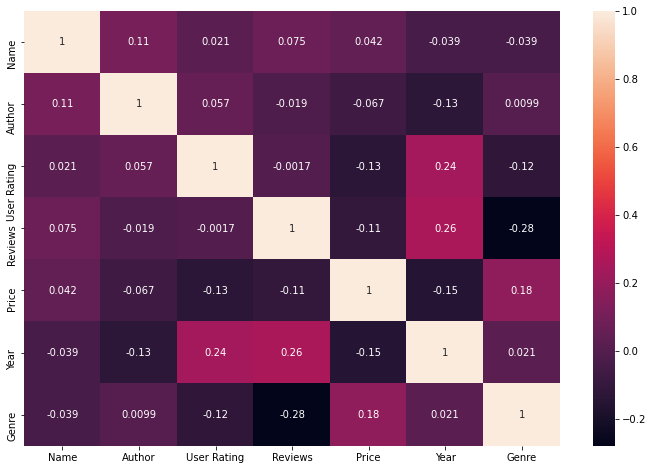

In [13]:
#check correlation and plot heatmap 
corr1 = df3.corr()
plt.figure(figsize = (12,8))
sns.heatmap(corr1,annot=True)
plt.show()

In [14]:
#Genre wise classification
pie_df = df.Genre.value_counts().reset_index()
pie_df.columns = ['Genre', 'count']
fig = px.pie(pie_df, values='count', names='Genre', title='Genre',
             color_discrete_sequence=['blue', 'light green'])
fig.show()

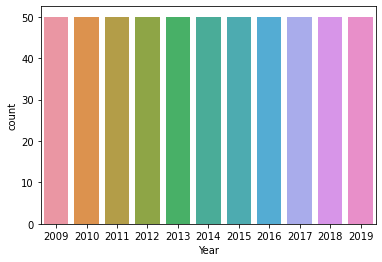

In [15]:
#variations wrt year 
sns.countplot('Year', data=df)
plt.show()

In [16]:
#import seaborn as sns
#sns.set_theme(style="darkgrid")
#p = sns.load_dataset("df")
#ax = sns.countplot(x="Price", data=p)

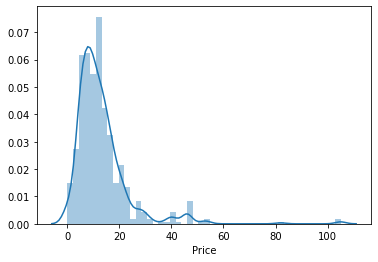

In [17]:
#how much it costs?
sns.distplot(df["Price"])

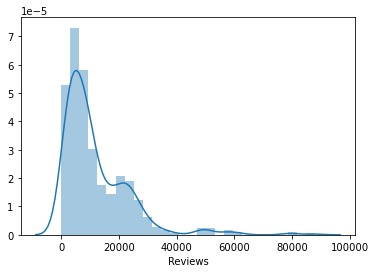

In [18]:
#What are people's reviews
sns.distplot(df["Reviews"])

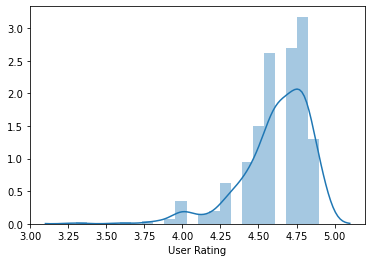

In [19]:
#How people rate the book
sns.distplot(df["User Rating"])

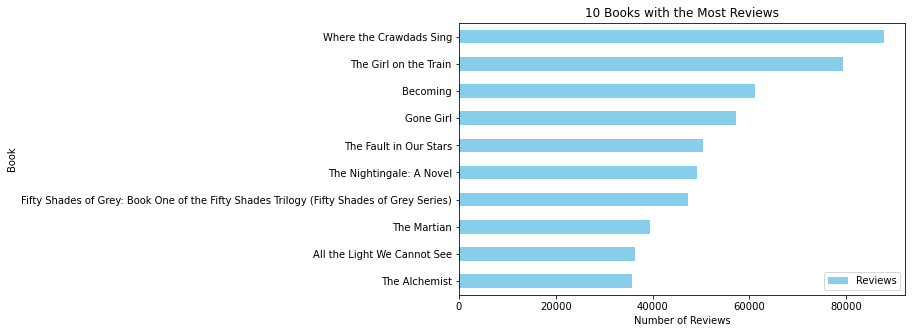

In [20]:
df_new1 = df.drop_duplicates(subset=['Name'])

highest_reviews = df_new1[['Name','Reviews']].groupby('Name').sum().sort_values('Reviews', ascending=False)

highest_reviews.iloc[:10].plot(kind='barh', color=['skyblue', 'blue'])
plt.gcf().set_size_inches(8, 5)
plt.title('10 Books with the Most Reviews')
plt.gca().invert_yaxis()
plt.xlabel('Number of Reviews')
_ = plt.ylabel('Book')

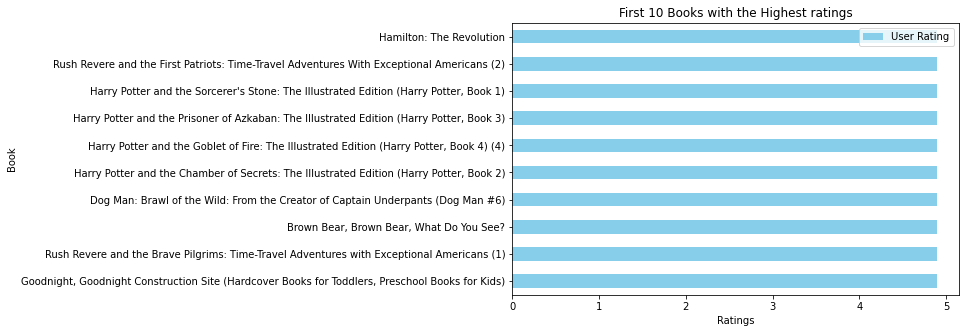

In [21]:
df_new1 = df.drop_duplicates(subset=['Name'])

#books with the highest number of reviews
highest_rating = df_new1[['Name','User Rating']].groupby('Name').sum().sort_values('User Rating', ascending=False)

highest_rating.iloc[:10].plot(kind='barh',color=['skyblue', 'blue'])
plt.gcf().set_size_inches(8,5)
plt.title('First 10 Books with the Highest ratings')
plt.gca().invert_yaxis()
plt.xlabel('Ratings')
_ = plt.ylabel('Book')

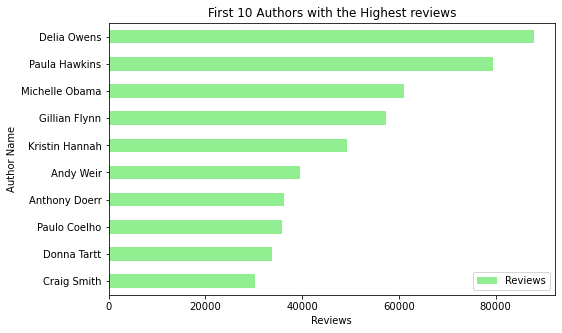

In [22]:
df_new2 = df.drop_duplicates(subset=['Author'])

#authors with the highest number of reviews
highest_rating_auth = df_new2[['Author','Reviews']].groupby('Author').sum().sort_values('Reviews', ascending=False)

highest_rating_auth.iloc[:10].plot(kind='barh',color=['lightgreen', 'blue'])
plt.gcf().set_size_inches(8,5)
plt.title('First 10 Authors with the Highest reviews')
plt.gca().invert_yaxis()
plt.xlabel('Reviews')
_ = plt.ylabel('Author Name')

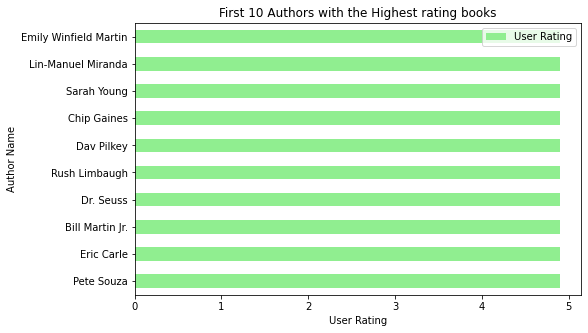

In [23]:
df_new = df.drop_duplicates(subset=['Author'])

#authors with the highest number of reviews
highest_rating_auth = df_new[['Author','User Rating']].groupby('Author').sum().sort_values('User Rating', ascending=False)

highest_rating_auth.iloc[:10].plot(kind='barh',color=['lightgreen', 'blue'])
plt.gcf().set_size_inches(8,5)
plt.title('First 10 Authors with the Highest rating books')
plt.gca().invert_yaxis()
plt.xlabel('User Rating')
_ = plt.ylabel('Author Name')

In [24]:
#Dependent variables
X = np.array(df3[['Name', 'Author', 'Reviews', 'Price', 'Year', 'Genre']]) 

#Independent variables
y = np.array(df3["User Rating"])  

In [25]:
X

array([[    0,   114, 17350,     8,  2016,     1],
       [    1,   219,  2052,    22,  2011,     0],
       [    2,   134, 18979,    15,  2018,     1],
       ...,
       [  350,   121, 14331,     8,  2017,     1],
       [  350,   121, 14331,     8,  2018,     1],
       [  350,   121, 14331,     8,  2019,     1]])

In [26]:
y

array([4.7, 4.6, 4.7, 4.7, 4.8, 4.4, 4.7, 4.7, 4.7, 4.6, 4.6, 4.6, 4.6,
       4.5, 4.6, 4.5, 4.6, 4.4, 4.5, 4.8, 4.6, 4.6, 3.9, 4.6, 4.3, 4.6,
       4.7, 4.2, 4.6, 4.6, 4.8, 4.7, 4.8, 4.8, 4.8, 4.7, 4.7, 4.7, 4.6,
       4.5, 4.9, 4.9, 4.8, 4.6, 4.8, 4.5, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7,
       4.7, 4.3, 4.8, 4.8, 4.6, 4.6, 4.8, 4.4, 4.6, 4.3, 4.2, 4.8, 4.8,
       4.8, 4.8, 4.6, 4.6, 4.5, 4.5, 4.8, 4.8, 4.8, 4.6, 4.6, 4.6, 4.5,
       4.6, 4.7, 4.8, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.8, 4.6, 4.5,
       4.5, 4.3, 4.5, 4.5, 4.7, 4.7, 4.7, 4.7, 4.7, 4.6, 4.6, 4.7, 4.4,
       4.4, 4.5, 3.8, 3.8, 4.5, 4.2, 4.7, 4.7, 4.7, 4.7, 4.7, 4.4, 4.7,
       4.4, 4.6, 4.6, 4.6, 4.5, 4.6, 4.8, 4.8, 4.8, 4.8, 4.8, 4.6, 4.6,
       4.6, 4.6, 3.6, 4.8, 4.6, 4. , 4. , 4. , 4.6, 4.5, 4.5, 4.5, 4.5,
       4.8, 4.8, 4.8, 4.9, 4.9, 4.6, 4.4, 4.8, 4.9, 4.8, 4.9, 4. , 4.9,
       4.9, 4.9, 4.7, 4.8, 4.8, 4.7, 4.7, 4.4, 4.4, 4.8, 4.7, 4.7, 4.7,
       4.7, 4.7, 4.3, 4.8, 4.8, 4.9, 4.7, 4.8, 4.6, 4.8, 4.8, 4.

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 100)                                    

In [28]:
#Perform Linear Regression
from sklearn import linear_model
# Create linear regression object
reg = linear_model.LinearRegression()
# Train the model 
reg.fit(X_train, y_train)
y1 = reg.predict(X_test)

In [29]:
print("Mean Absolute Error: " + str(mean_absolute_error(y_test, y1)))

Mean Absolute Error: 0.1669345745737908


In [30]:
print("Mean Square Error: " + str(mean_squared_error(y_test, y1)))

Mean Square Error: 0.04523247402376413


In [31]:
print("Root Mean Square Error: " + str(math.sqrt(mean_squared_error(y_test, y1))))

Root Mean Square Error: 0.21267927502171935


In [32]:
print("R2 score: " + str(r2_score(y_test, y1)))

R2 score: -0.009603772358845353
